# Counting

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

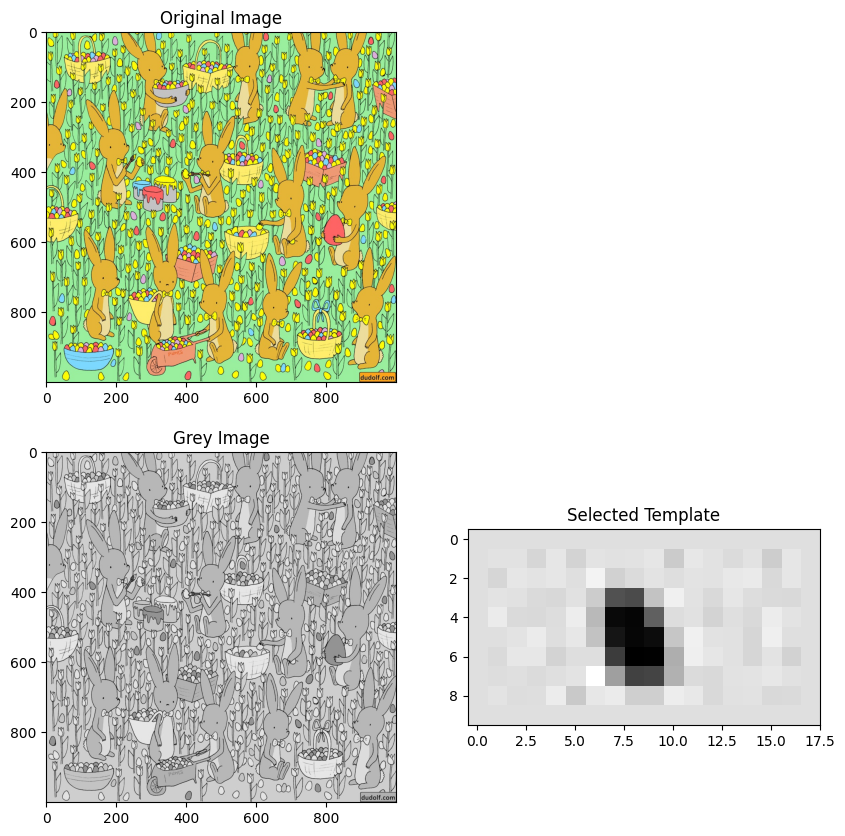

In [36]:
# Load the image
image = cv2.imread("rabbit.jpeg")
# Convert the image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert the image to grey
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(2, 2, 3)
plt.imshow(grey_image, cmap='grey')
plt.title('Grey Image')

# Select the region of interest
x1, x2 = 287, 305
y1, y2 = 103, 113
template = grey_image[y1:y2, x1:x2]

plt.subplot(2, 2, 4)
plt.imshow(template, cmap='gray')
plt.title('Selected Template')
plt.show()

In [37]:
result = cv2.matchTemplate(grey_image, template, cv2.TM_CCOEFF_NORMED)

In [55]:
threshold = 0.82
locations = np.where(result >= threshold)

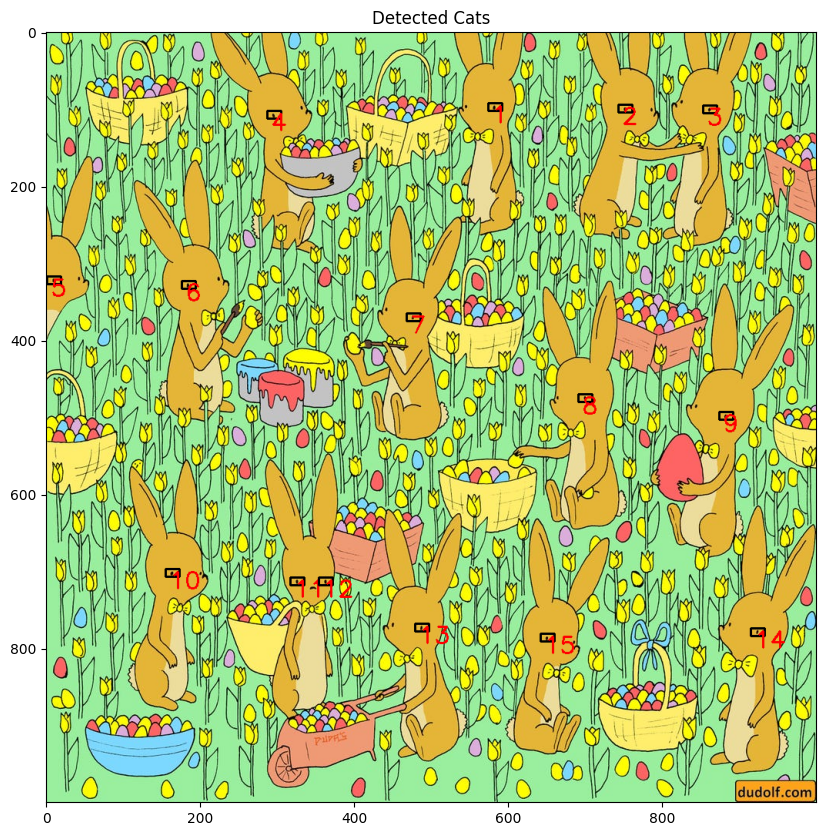

In [56]:
image_copy = image_rgb.copy()
skip_zone = np.zeros_like(image)
w, h = template.shape[::-1]

count = 0

for pt in zip(*locations[::-1]):
    if skip_zone[pt[1]:pt[1] + h, pt[0]:pt[0] + w].sum() == 0:
        # Draw rectangle around the detected cat
        cv2.rectangle(image_copy, pt, (pt[0] + w, pt[1] + h), (0, 0, 0), 2)
        count += 1
        # Put the count on the detected cat
        cv2.putText(image_copy, str(count), (pt[0] + 5, pt[1] + 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        # Mark the detected cat in the skip zone
        skip_zone[pt[1]:pt[1] + h, pt[0]:pt[0] + w] = 1

plt.figure(figsize=(10, 10))
plt.imshow(image_copy)
plt.title('Detected Cats')
plt.show()

In [57]:
print(f'Number of objects found: {count}')

Number of objects found: 15
